<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

# Proyecto: California WildFires

## Etapa de proyecto:  Propuesta de trabajo

__Profesor__:  

Alonso Ogueda O.

__Integrantes__:   
               
- Pilar Cerda M. <br> __Rol__: 201504079-6 
- Ian Mancilla W.  <br>  __Rol__: 201584032-6
- Alvaro Marambio V. <br> __Rol__: 782020203-6 

##  Prediciendo Incendios de California


 El estado de California en Estados Unidos es uno de los lugares con las temporadas de incendios forestales más mortíferas y destructivas. El conjunto de datos contiene la  
 lista de incendios forestales que ocurrieron en California entre 2013 y 2019. En concreto, se incluye la ubicación donde ocurrieron los incendios forestales, el nombre del condado, 
los valores de latitud y longitud, y también detalles sobre cuándo comenzó el incendio forestal.

¡Estos datos ayudan a generar información sobre qué lugares de California están bajo amenaza de incendio, a qué hora suelen ocurrir los incendios forestales y qué tan  
frecuentes y devastadores son! 

La intención de analizar los datos de incendios de California es intentar realizar un simil con los incendios generados en Chile los ultimos años, problema que tambien nos afecta <br>
como pais de forma importante.

Una de las entidades involucradas en el control de incendios es el "El Departamento de Silvicultura y Protección contra Incendios de California" [CAL FIRE](https://www.fire.ca.gov/incidents/). Cuando El Departamento  <br>
responde a un incidente importante en la jurisdicción de CAL FIRE, el Departamento publicará los detalles del incidente en el sitio web. Los incidentes de emergencia importantes <br>  podrían incluir incendios forestales extensos de día extendido (10 acres o más), inundaciones, terremotos, derrames de materiales peligrosos, etc. En Chile la entidad que realiza un <br> trabajo similar es la CONAF.

<img src="https://static01.nyt.com/images/2020/09/08/science/08CLI-CALFIRES-update/merlin_176700381_709524cd-fbfe-499c-af77-596f80821067-superJumbo.jpg?quality=90&auto=webp" width="800" height="800">


El incendio de Creek en el condado de Madera, Californiaa.Creditos Josh Edelson / Agence France-Presse - Getty Images. [INCENDIO DE CREEK](https://www.nytimes.com/article/why-does-california-have-wildfires.html).

### Objetivos

El objetivo de este proyecto es enfrentar a los estudiantes del curso MAT281 a problemas de Machine Learning con todas las etapas (típicas) que eso implica. Basándose en cada uno  <br>
de los módulos del curso a lo largo del semestre es posible tener abarcar estas etapas, dando pie a la investigación y a la solución de problemas operacionales que el problema podría <br>
poseer inherentemente.  

En esta etapa de propuesta de proyecto se contempla:

* La presentación de los datos, definición de variables y contexto de la problemática intentando planteando cuál es la pregunta que desean resolver.
* El análisis estadístico de los datos y Visualización de variables.
* Evaluar si es necesario realizar preprocesamiento, inputación de datos faltantes y balanceo de datos.
* Finalmente se proponer 4 modelos y sus hiperparametros asociados [Link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

### Rúbrica

* __Presentación de los datos, definición de variables y contexto de la problemática.__ (10 pts)
* __¿Cuál es la pregunta que desean resolver?__ (5 pts)
* __Análisis estadístico de los datos__ (15 pts)
* __Visualización de variables.__ (15 pts)
* __¿Hay que realizar preprocesamiento?__ (15 pts)
* __¿Hay que realizar inputación de datos faltantes?__ (15 pts)
* __¿Hay que realizar balanceo de datos?__ (15 pts)
* __Propuesta de cuatro modelos y sus hiperparámetros asociados.__ (20 pts)


## Contenidos

[1.- Presentación de los datos y definición de variables](#pres_date)<br>
[2.- ¿Que pregunta deseamos resolver?](#preg)<br>
[3.- Análisis estadístico de los datos](#estad)<br>
[4.- Visualización de variables](#variab)<br>
[5.- Preprocesamiento](#proces)<br>
[6.- Inputación de datos faltantes](#inp)<br>
[7.- Balanceo de datos](#balan)<br>
[8.- Proposición de cuatro modelos y sus hiperparámetros asociados](#models)<br>
[9.- Conclusiones preliminares](#concl)<br>

<div id='pres_date' />

## 1.- Presentación de los datos y definición de variables

A continuación se presentan los datos y la definición de variables para el problema en estudio

In [22]:
import os
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import altair as alt
import ipywidgets as widgets  
from datetime import date 
from ipywidgets import interactive, interact

import warnings 

warnings.filterwarnings("ignore") 

# Plotting Libraries 

import matplotlib.pyplot as plt 

import matplotlib.style as style 

 

# Seaborn Library Setting 

import seaborn as sns 

alt.themes.enable('opaque') 

%matplotlib inline

In [2]:
Fire = pd.read_csv(os.path.join("..","data", "California_Fire_Incidents.csv"))

Fire.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [3]:
#Inicialmente se cambia columna de Acres a hectáreas por comodidad de unidades, que será el target a analizar: 
Fire["Hectares"]=Fire["AcresBurned"]/2.4711 

#Se cambia el formato de tiempo a datetime (inicialmente a Extinguished y posteriormente a Started igualmente): 
Fire.Extinguished=pd.to_datetime(Fire.Extinguished) 

#(Luego se dropea Acres) 
Fire=Fire.drop(axis=1, columns="AcresBurned") 

In [4]:
Fire.isnull().sum()  #Se revisan los datos nulos de cada columna

Active                     0
AdminUnit                  0
AirTankers              1608
ArchiveYear                0
CalFireIncident            0
CanonicalUrl               0
ConditionStatement      1352
ControlStatement        1525
Counties                   0
CountyIds                  0
CrewsInvolved           1465
Dozers                  1513
Engines                 1445
Extinguished              59
Fatalities              1615
Featured                   0
Final                      0
FuelType                1624
Helicopters             1552
Injuries                1516
Latitude                   0
Location                   0
Longitude                  0
MajorIncident              0
Name                       0
PercentContained           3
PersonnelInvolved       1432
Public                     0
SearchDescription         17
SearchKeywords           203
Started                    0
Status                     0
StructuresDamaged       1569
StructuresDestroyed     1461
StructuresEvac

Fire.isnull().sum()

In [5]:
Fire.dtypes   #Se revisan los tipos de datos de cada columna

Active                                 bool
AdminUnit                            object
AirTankers                          float64
ArchiveYear                           int64
CalFireIncident                        bool
CanonicalUrl                         object
ConditionStatement                   object
ControlStatement                     object
Counties                             object
CountyIds                            object
CrewsInvolved                       float64
Dozers                              float64
Engines                             float64
Extinguished            datetime64[ns, UTC]
Fatalities                          float64
Featured                               bool
Final                                  bool
FuelType                             object
Helicopters                         float64
Injuries                            float64
Latitude                            float64
Location                             object
Longitude                       

<div id='preg' />

## 2.- ¿Qué pregunta deseamos resolver?

Queremos predecir qué condados del estado de California tendrán más hectáreas incendiadas y en qué fechas

<div id='estad' />

## 3.- Análisis estadístico de los datos

A continuación se presenta un análisis estadístico de los datos escogidos para el análisis del problema en estudio

In [6]:
Fire.describe(include="all",datetime_is_numeric='True').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Active,1636,1,False,1636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdminUnit,1636,494,CAL FIRE Sonoma-Lake-Napa Unit,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AirTankers,28,NaN,NaN,NaN,4.07143,0,2,2,4,27,6.39982
ArchiveYear,1636,NaN,NaN,NaN,2016.61,2013,2015,2017,2018,2019,1.84534
CalFireIncident,1636,2,True,1251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CanonicalUrl,1636,1607,/incidents/2013/6/10/sonoma-lake-napa-unit-lig...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConditionStatement,284,258,The fire has transitioned to the USFS Mendocin...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ControlStatement,111,92,All road closures have been lifted.,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Counties,1636,59,Riverside,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountyIds,1636,79,33,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Active                1636 non-null   bool               
 1   AdminUnit             1636 non-null   object             
 2   AirTankers            28 non-null     float64            
 3   ArchiveYear           1636 non-null   int64              
 4   CalFireIncident       1636 non-null   bool               
 5   CanonicalUrl          1636 non-null   object             
 6   ConditionStatement    284 non-null    object             
 7   ControlStatement      111 non-null    object             
 8   Counties              1636 non-null   object             
 9   CountyIds             1636 non-null   object             
 10  CrewsInvolved         171 non-null    float64            
 11  Dozers                123 non-null    float64            
 12  Engine

Outliers en  CrewsInvolved : 10
Outliers en  Dozers : 18
Outliers en  Engines : 11
Outliers en  Fatalities : 3
Outliers en  Hectares : 252
Outliers en  Helicopters : 12
Outliers en  Injuries : 4
Outliers en  Latitude : 161
Outliers en  Longitude : 163
Outliers en  PersonnelInvolved : 11
Outliers en  StructuresDamaged : 8
Outliers en  StructuresDestroyed : 22
Outliers en  WaterTenders : 17


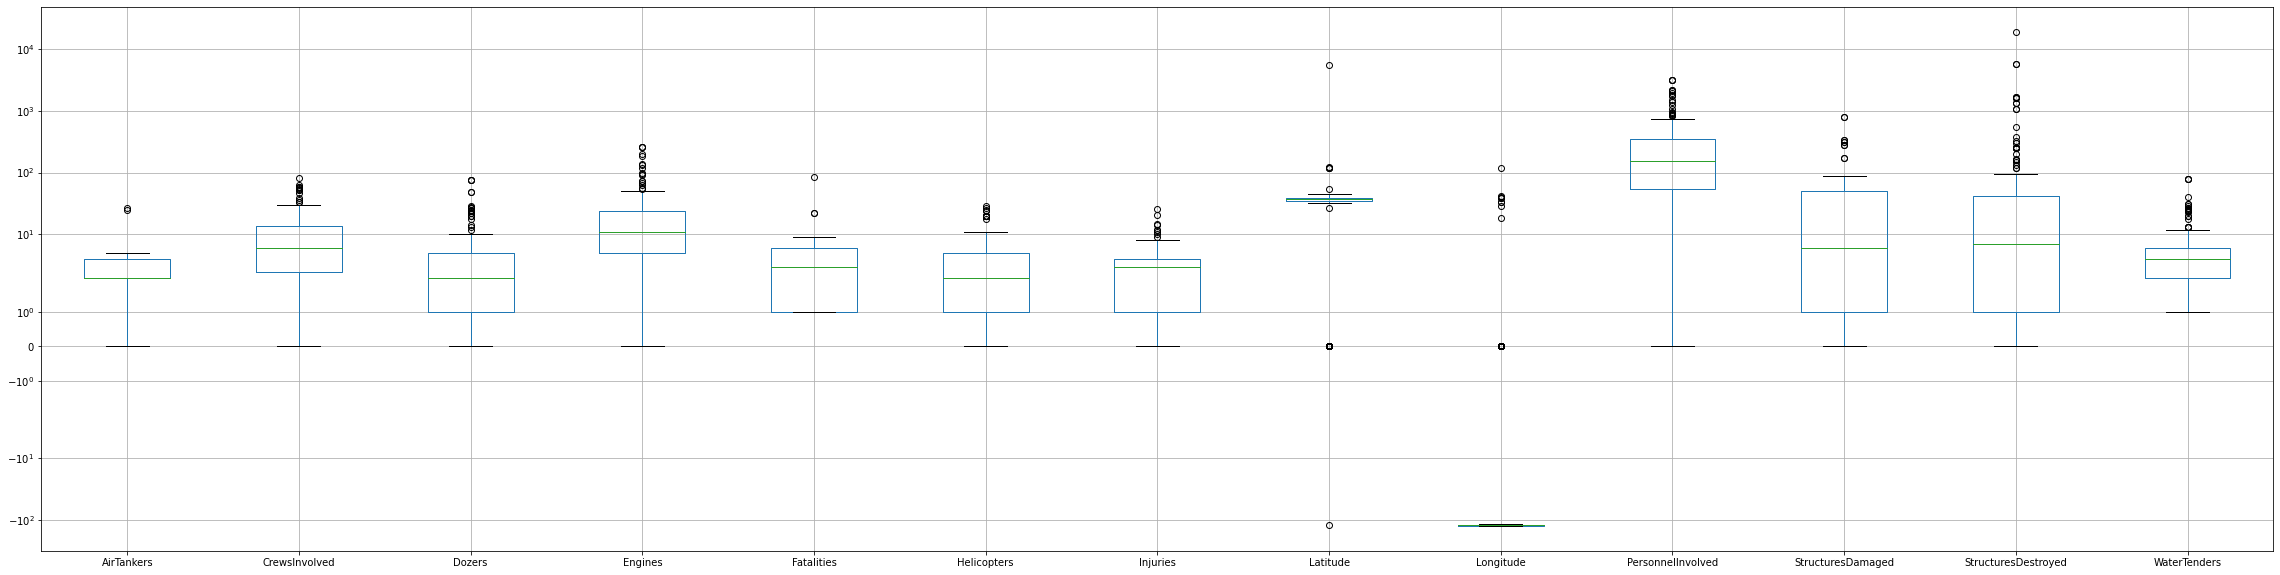

In [8]:
#Box plot : df es base de datos originales  

plt.figure(figsize=(40,10)) 

plt.yscale('symlog') 

Fire.boxplot(column=["AirTankers","CrewsInvolved","Dozers","Engines","Fatalities","Helicopters","Injuries","Latitude","Longitude","PersonnelInvolved","StructuresDamaged","StructuresDestroyed","WaterTenders"],) 

Q1=Fire.describe().T['25%'] 

Q3=Fire.describe().T['75%'] 

RIQ=Q3-Q1 

LI=Q1-3*RIQ 

LS=Q3+3*RIQ 

colum=["CrewsInvolved","Dozers","Engines","Fatalities","Hectares","Helicopters","Injuries","Latitude","Longitude","PersonnelInvolved","StructuresDamaged","StructuresDestroyed","WaterTenders"] 

for col in colum: 

    k=0 

    for i in Fire[col]: 

        if i<LI[col] or i>LS[col]: 

            k+=1         

    print('Outliers en ', col,':',k) 

In [9]:
#Se cambia fecha a formato datetime y se ordena por año mes y día.  
dt=pd.DatetimeIndex(Fire.Started)  

Fire["Mes"]=dt.month 

Fire["Mes"]=Fire["Mes"].dropna(axis=0, inplace=False) 

Fire["Año"]=dt.year 

Fire["Año"]=Fire["Año"].dropna(axis=0, inplace=False) 

Fire["Dia"]=dt.day 

Fire["Dia"]=Fire["Dia"].dropna(axis=0, inplace=False)

Fire["Hora"]=dt.hour

Fire["Hora"]=Fire["Hora"].dropna(axis=0, inplace=False)


Fire["Fecha"]=pd.to_datetime(Fire["Started"]).dt.date

Fire["Fecha"]= pd.to_datetime(Fire["Fecha"]).dt.normalize()  #Se restaura formato pero con el display modificado

Fire["Fecha"]

0      2013-08-17
1      2013-05-30
2      2013-07-15
3      2013-08-10
4      2013-05-02
          ...    
1631   2019-10-10
1632   2019-06-28
1633   2019-11-25
1634   2019-10-22
1635   2019-10-14
Name: Fecha, Length: 1636, dtype: datetime64[ns]

In [10]:
#Se revisan los valores de cada columna 

a=Fire.loc[:,"Dia"].unique() 

print(sorted(a)) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [11]:
b=Fire.loc[:,"Mes"].unique() 

print(sorted(b)) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [12]:
c=Fire.loc[:,"Año"].unique() 

print(sorted(c)) 

[1969, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


### Se eliminan columnas con demasiados datos nulos, erróneas (Como countyIds que tenían más) 

In [13]:
Fire=Fire.drop(['AirTankers','ConditionStatement','ControlStatement','CrewsInvolved','Dozers','Engines','FuelType','Helicopters','WaterTenders','Fatalities','Injuries','PersonnelInvolved','StructuresDamaged','StructuresDestroyed','StructuresThreatened','StructuresEvacuated','AdminUnit','CanonicalUrl','SearchDescription','SearchKeywords','UniqueId','Featured','Location','Name','PercentContained','Public','MajorIncident','Status','Active'], axis=1)
Fire.head()

,ArchiveYear,CalFireIncident,Counties,CountyIds,Extinguished,Final,Latitude,Longitude,Started,Updated,Hectares,Mes,Año,Dia,Hora,Fecha
0,2013,True,Tuolumne,55,2013-09-06 18:30:00+00:00,True,37.857000,-120.086000,2013-08-17T15:25:00Z,2013-09-06T18:30:00Z,104129.335114,8,2013,17,15,2013-08-17
1,2013,True,Los Angeles,19,2013-06-08 18:30:00+00:00,True,34.585595,-118.423176,2013-05-30T15:28:00Z,2013-06-08T18:30:00Z,12251.224151,5,2013,30,15,2013-05-30
2,2013,True,Riverside,33,2013-07-30 18:00:00+00:00,True,33.709500,-116.728850,2013-07-15T13:43:00Z,2013-07-30T18:00:00Z,11141.192182,7,2013,15,13,2013-07-15
3,2013,False,Placer,31,2013-08-30 08:00:00+00:00,True,39.120000,-120.650000,2013-08-10T16:30:00Z,2013-08-30T08:00:00Z,11104.366476,8,2013,10,16,2013-08-10
4,2013,True,Ventura,56,2013-05-11 06:30:00+00:00,True,0.000000,0.000000,2013-05-02T07:01:00Z,2013-05-11T06:30:00Z,9813.848084,5,2013,2,7,2013-05-02


In [14]:
Fire= Fire[Fire.Año != 1969] #Se elimina año que no aporta al análisis
c=Fire.loc[:,"Año"].unique()
print(sorted(c))

[2013, 2014, 2015, 2016, 2017, 2018, 2019]


Se hace un análisis estacional para comprender la recurrencia de incendios por cada temporada de California

<p>Agrupación por temporadas:</p>
   <p> Primavera: desde el 21 de marzo al 20 de junio. </p>
    <p>Verano: desde el 21 de junio al 22 de septiembre. </p>
    <p>Otoño: desde el 23 de septiembre al 20 de diciembre. </p>
    <p>Invierno: desde el 21 de diciembre al 20 de marzo.</p>

In [15]:
date = Fire.Fecha.dt.month*100 + Fire.Fecha.dt.day
Fire['Estacion'] = (pd.cut(date,[0,321,620,922,1220,1300],
                       labels=['Invierno','Primavera','Verano','Otoño','Invierno '])
                  .str.strip())

Fire['date_offset'] = (Fire.Fecha.dt.month*100 + Fire.Fecha.dt.day - 320)%1300

Fire['Estacion'] = pd.cut(Fire['date_offset'], [0, 300, 602, 900, 1300], 
                           labels=['Primavera', 'Verano', 'Otoño', 'Invierno'])
Fire.loc[:,"Estacion"]

0          Verano
1       Primavera
2          Verano
3          Verano
4       Primavera
          ...    
1631        Otoño
1632       Verano
1633        Otoño
1634        Otoño
1635        Otoño
Name: Estacion, Length: 1634, dtype: category
Categories (4, object): ['Primavera' < 'Verano' < 'Otoño' < 'Invierno']

In [16]:
Fire["Estacion"].value_counts().index

CategoricalIndex(['Verano', 'Primavera', 'Otoño', 'Invierno'], categories=['Primavera', 'Verano', 'Otoño', 'Invierno'], ordered=True, dtype='category')

In [17]:
admin_indx = Fire["Counties"].value_counts().index
admin_count = Fire["Counties"].value_counts().values

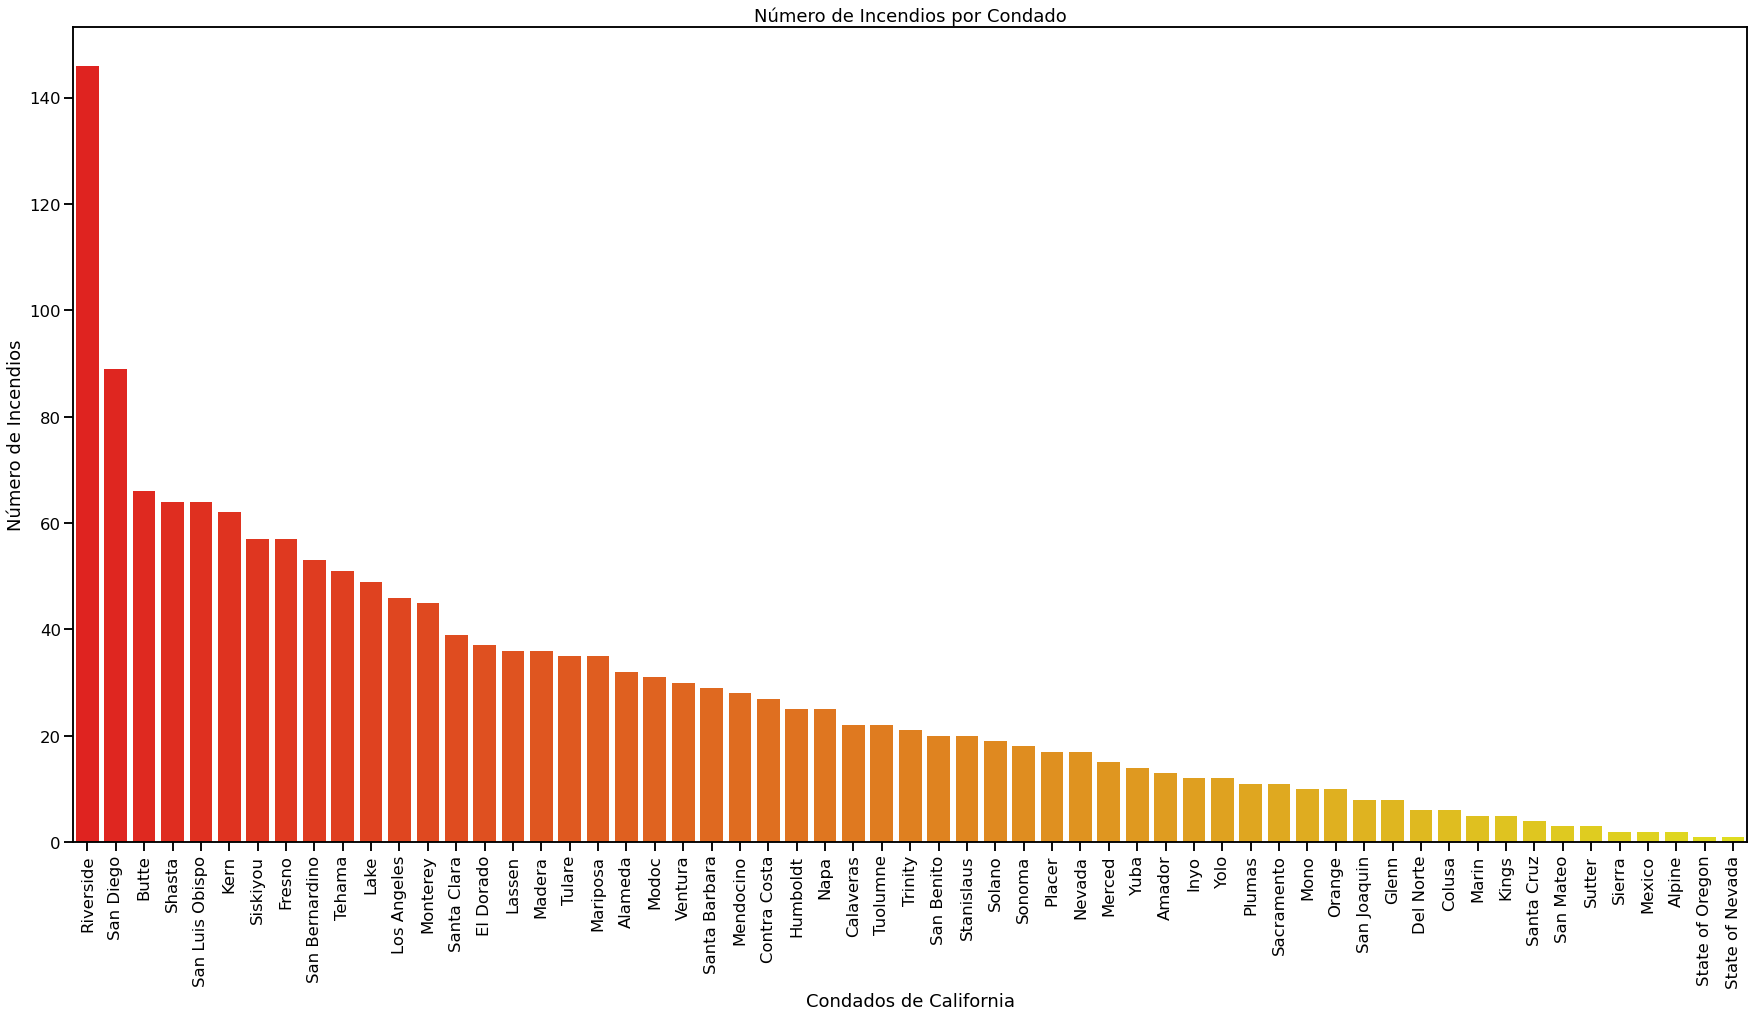

In [35]:
plt.figure(figsize=(30,15)) 

sns.set_context("talk") 

g=sns.barplot( x =admin_indx , y=admin_count, palette  = "autumn"); 

# sns.scatterplot(x = "Counties", y = ) 

plt.title('Número de Incendios por Condado') 

plt.xlabel('Condados de California') 
plt.ylabel('Número de Incendios') 

plt.xticks(rotation=90) 
warnings.filterwarnings("ignore") 


<div id='variab' />

## 4.-  Visualización de variables

A continuación presentamos la visualización de variables del problema en estudio

In [45]:
#En primer lugar se grafican las hectáreas quemadas vs tiempo y según las estaciones de California 
Hectareasfecha=alt.Chart(Fire).mark_bar().encode(
    x=alt.X('Fecha:T', axis=alt.Axis(title="Fecha, año")),
    y=alt.Y('Hectares:Q', axis=alt.Axis(title='Área quemada, ha')),
    tooltip=[alt.Tooltip('Hectares',title="Hectáreas"), alt.Tooltip("Fecha",title="Fecha UTC")]).properties(title="Hectáreas quemadas vs Tiempo ",
    width=400, 
    height=400).interactive()
Hectareasest=alt.Chart(Fire).mark_bar().encode(
    x=alt.X('Estacion:N', axis=alt.Axis(title="Estación")),
    y=alt.Y('Hectares:Q', axis=alt.Axis(title='Área quemada, ha')),
    tooltip=[alt.Tooltip('Hectares',title="Hectáreas"), alt.Tooltip("Fecha",title="Fecha UTC")]).properties(title="Hectáreas quemadas vs Temporada",
    width=400, 
    height=400).interactive()


Hectareasfecha&Hectareasest

alt.VConcatChart(...)

Se nota que es necesario hacer una estandarización de los datos al notar el primer gráfico, donde en algunos siniestros el área quemada <br> fue muy superior al promedio

In [31]:
ninc=Fire["Estacion"].value_counts().to_frame(name="Incendios") #Se genera data para visualizar los incendios por estación 
ninc=ninc.reset_index() 
ninc["index"]=ninc["index"].astype(str)
ninc.dtypes, ninc

(index        object
 Incendios     int64
 dtype: object,
        index  Incendios
 0     Verano        968
 1  Primavera        391
 2      Otoño        247
 3   Invierno         28)

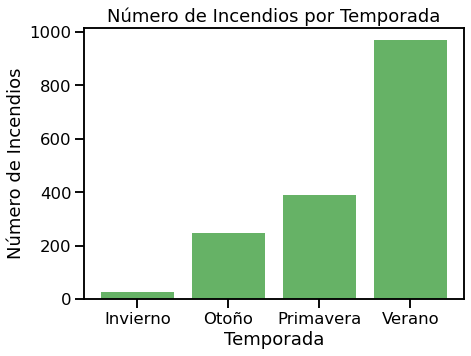

In [43]:
y = list(reversed(list(ninc["Incendios"])))
x=list(reversed(list(ninc["index"])))
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(x, y, align='center', color="g", alpha=0.6)
plt.xticks()
plt.xlabel("Temporada")
plt.ylabel('Número de Incendios')
plt.title("Número de Incendios por Temporada")
plt.show()

<div id='proces' />

## 5.- Preprocesamiento

Es hora de preparar los datos para la selección de modelos. Se solicita que:

* Crear el _numpy.array_ `X_raw` con las columnas predictoras de `df`.
* Crear el _numpy.array_ `y` con la columna a predecir de `df`.
* Definir un _transformer_ `StandarScaler` declarado como `scaler`, luego ajustar con los datos de `X_raw`.
* Definir el _numpy.array_ `X` luego de transformar los datos de `X_raw` con `scaler`. Verificar que tenga media nula y desviación estándar unitaria.
* Dividir la data en _train_ (90%) y _test_ (10%) utilizando como argumento `random_state=42`.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [21]:
X_raw = df_matrix.values
y = df['is_pulsar'].tolist()
df_matrix

NameError: name 'df_matrix' is not defined

In [ ]:
scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw)

In [ ]:
print('Promedio: ', X.mean())
print('Sesviación Estandar:',np.std(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

<div id='inp' />

## 6.- Inputación de datos faltantes

<div id='balan' />

## 7.- Balanceo de datos

Las clases desequilibradas dejan la "precisión" un poco de lado. Este es un problema sorprendentemente común en el aprendizaje automático (específicamente en la clasificación), que ocurre en conjuntos de datos con una proporción desproporcionada de observaciones en cada clase.

La precisión estándar ya no mide el rendimiento de manera confiable, lo que hace que el entrenamiento de modelos sea mucho más complicado.

Las clases desequilibradas aparecen en muchos dominios, que incluyen:

*Detección de fraudes<br>
*Filtrado de spam<br>
*Detección de enfermedades<br>
*Cancelación de suscripción de SaaS<br>
*Clics publicitarios<br>  

Ejemplo: Detección de enfermedades
Supongamos que su cliente es un hospital de investigación líder y le ha pedido que entrene un modelo para detectar una enfermedad en función de los datos biológicos recopilados de los pacientes.

Pero aquí está el truco ... la enfermedad es relativamente rara; ocurre en sólo el 8% de los pacientes que son examinados.

Ahora, incluso antes de empezar, ¿ves cómo podría resolverse el problema? Imagínese si no se molestara en entrenar a un modelo. En cambio, ¿qué pasaría si escribiera una sola línea de código que siempre predice "No hay enfermedad"?

¿Bien adivina que? ¡Su "solución" tendría un 92% de precisión!

Desafortunadamente, esa precisión es engañosa.

Para los pacientes que no tienen la enfermedad, tendría un 100% de precisión.
Para los pacientes que tienen la enfermedad, tendría un 0% de precisión.
Su precisión general sería alta simplemente porque la mayoría de los pacientes no tienen la enfermedad (no porque su modelo sea bueno).
Esto es claramente un problema porque muchos algoritmos de aprendizaje automático están diseñados para maximizar la precisión general. El resto de esta guía ilustrará diferentes tácticas para manejar clases desequilibradas.


### Respuesta

El problema de desbalance de datos es mas comun que se de en problemas de clasificacion, para nuestro caso tenemos un problema de regresion en el cual contamos con una desproporcion evidente de datos que nos pueda generar un problema de desbalanceo

<div id='models' />

## 8.- Proposición de cuatro modelos y sus hiperparámetros asociados

<div id='concl' />

## 9.- Conclusiones preliminares